# Using Train.csv

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle


In [2]:
# Load the data to a pandas dataframe

df = pd.read_csv('dataset/train.csv') 


df.shape    # this should the output of row, column

(2190, 13)

In [3]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
df.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


In [5]:
df["day"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
print("df Info:")
df.info()

df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [7]:
df.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [8]:
df = pd.DataFrame(df)

In [9]:
df = df.drop(columns=['day']) 

In [10]:
print(df)

        id  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0        0    1017.4     21.2         20.6     19.9      19.4      87.0   
1        1    1019.5     16.2         16.9     15.8      15.4      95.0   
2        2    1024.1     19.4         16.1     14.6       9.3      75.0   
3        3    1013.4     18.1         17.8     16.9      16.8      95.0   
4        4    1021.8     21.3         18.4     15.2       9.6      52.0   
...    ...       ...      ...          ...      ...       ...       ...   
2185  2185    1014.6     23.2         20.6     19.1      19.9      97.0   
2186  2186    1012.4     17.2         17.3     16.3      15.3      91.0   
2187  2187    1013.3     19.0         16.3     14.3      12.6      79.0   
2188  2188    1022.3     16.4         15.2     13.8      14.7      92.0   
2189  2189    1013.8     21.2         19.1     18.0      18.0      89.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
0      88.0       1.1           60.0   

In [11]:
# checking the number of missing values

df.isnull().sum()

id               0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [12]:
#handling missing values
df["winddirection"].unique()

df["winddirection"] = df["winddirection"].fillna(df["winddirection"].mode()[0])
df["windspeed"] = df["windspeed"].fillna(df["windspeed"].median())

In [13]:
print(df.isnull().sum())

id               0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [14]:
df["rainfall"].unique()

array([1, 0])

In [15]:
print(df.columns)

Index(['id', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')


In [16]:
df.head()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


# Exploratory Data Analysis (EDA)

![alt text](explain.png "Title")

![alt text](explain1.png "Title")

In [17]:
df.shape

(2190, 12)

In [18]:
sns.set(style="whitegrid")   #setting plot style for all the plots

df.describe()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [19]:
df.columns

Index(['id', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

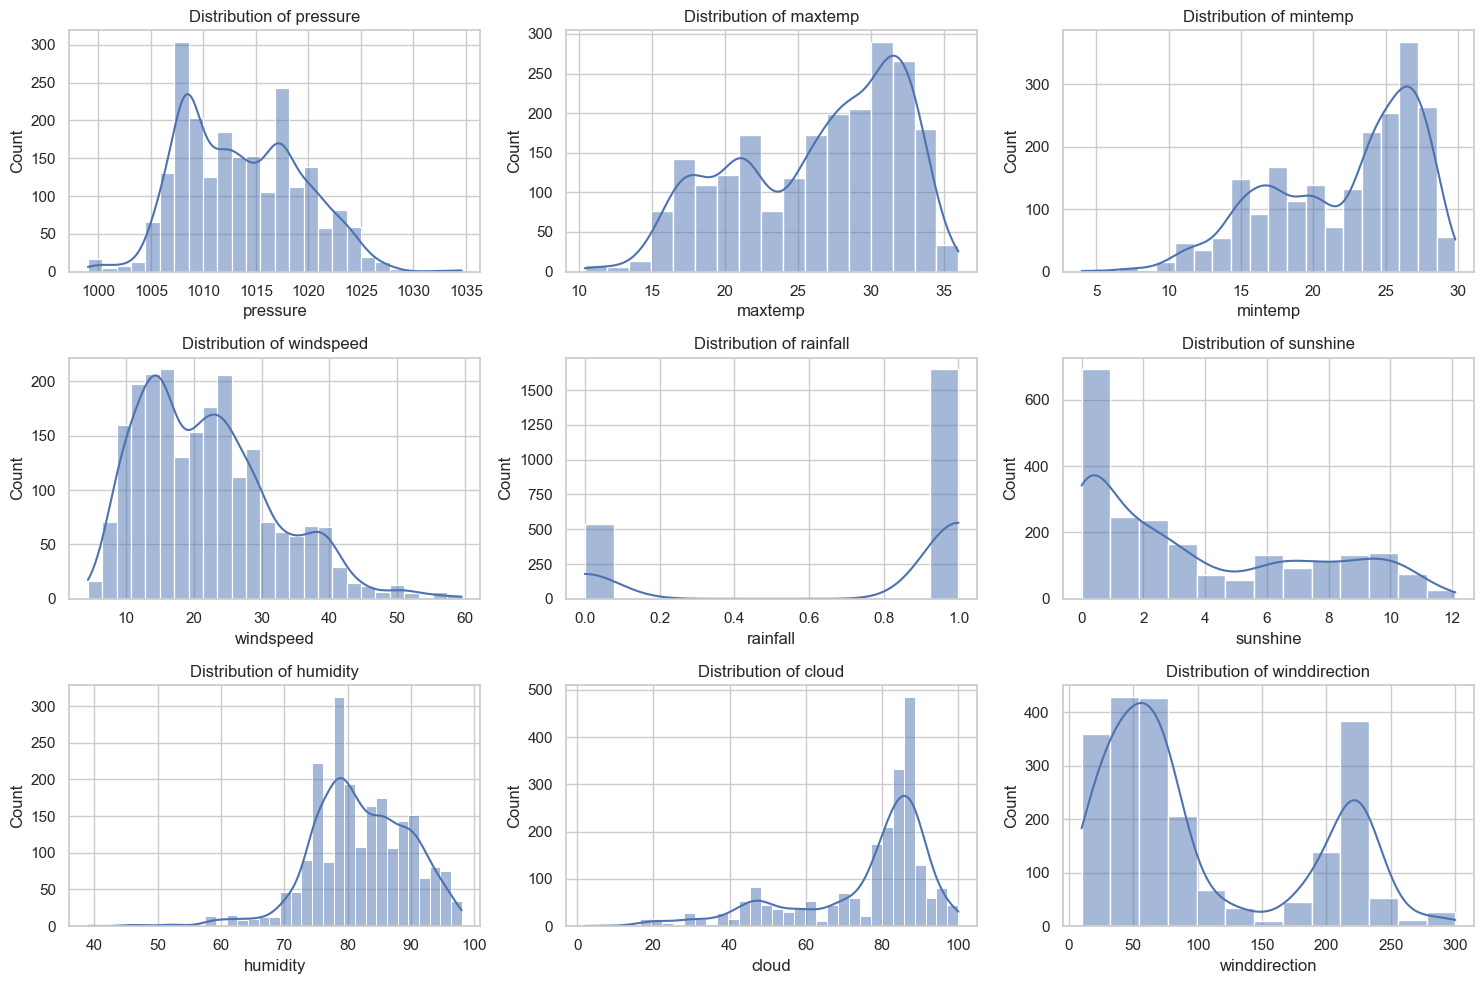

In [20]:
# Adjust the figure size
plt.figure(figsize=(15, 10))

# List of columns to plot
columns = ['pressure', 'maxtemp', 'mintemp', 'windspeed', 'rainfall', 'sunshine', 'humidity', 'cloud', 'winddirection']

# Adjust the grid layout to match the number of columns
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid layout for 9 plots
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

# Adjust subplots to fit into the figure area
plt.tight_layout()
plt.show()

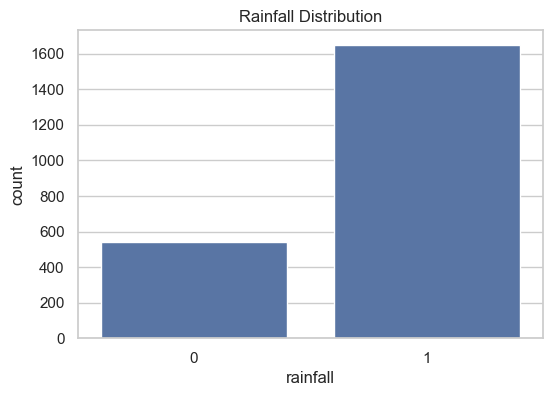

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='rainfall', data=df)
plt.title('Rainfall Distribution')
plt.show()

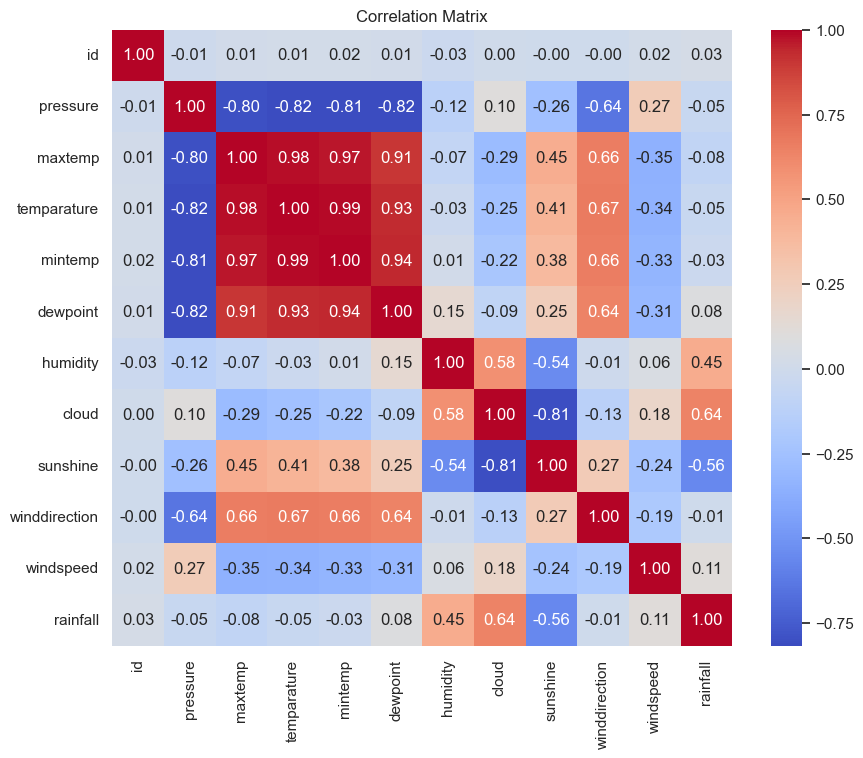

In [22]:
# ploting correlaton matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()


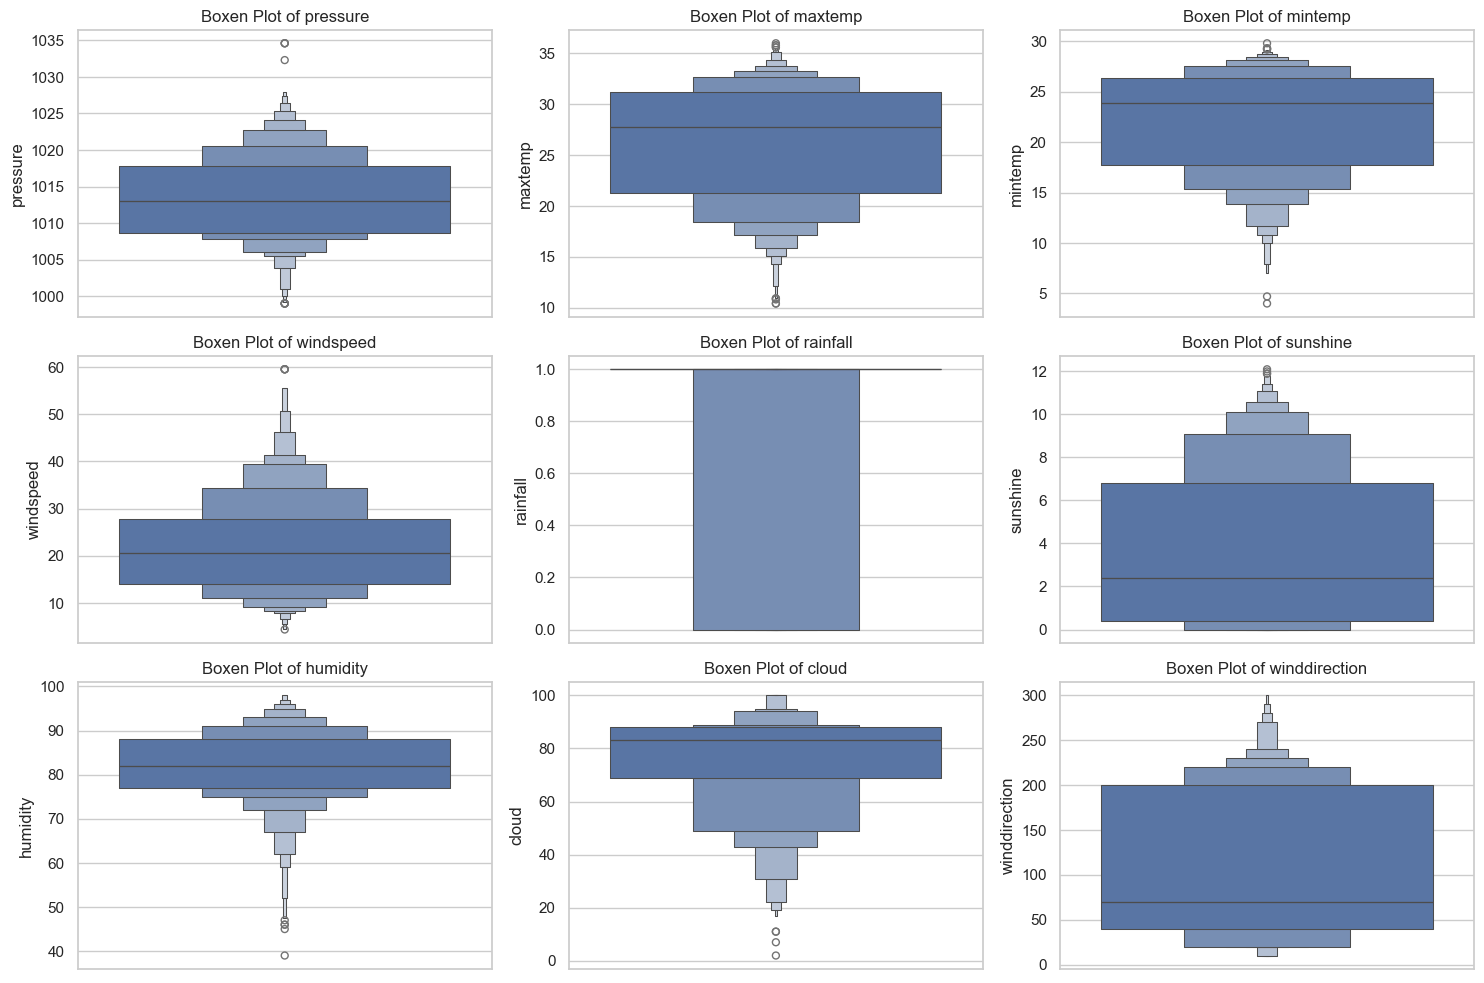

In [23]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'mintemp', 'windspeed', 'rainfall', 'sunshine', 'humidity', 'cloud', 'winddirection'], 1):
    plt.subplot(3, 3, i)
    sns.boxenplot(df[column])
    plt.title(f"Boxen Plot of {column}")


plt.tight_layout()
plt.show()




# Data Preprocessing

In [24]:
# Drop highly correlated columns

df = df.drop(columns=['maxtemp', 'mintemp'])

In [25]:
df.head() 

,id,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1017.4,20.6,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,1019.5,16.9,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,1024.1,16.1,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,1013.4,17.8,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,1021.8,18.4,9.6,52.0,45.0,3.6,40.0,24.8,0


In [26]:
df["rainfall"].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

In [27]:
# seperate majority and minority classes
df_majority = df[df.rainfall==1]
df_minority = df[df.rainfall==0]

print(df_majority.shape)
print(df_minority.shape)

(1650, 10)
(540, 10)


In [28]:
# downsample majority class to match minority count

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

df_majority_downsampled.shape

(540, 10)

In [29]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.shape

(1080, 10)

In [30]:
df_downsampled.head()


,id,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
658,658,1017.8,24.7,21.8,85.0,88.0,2.7,50.0,39.5,1
87,87,1012.2,25.9,22.6,86.0,84.0,1.6,70.0,17.5,1
1237,1237,1006.5,30.0,25.0,69.0,70.0,6.9,220.0,23.9,1
657,657,1012.6,26.5,21.3,84.0,72.0,6.6,30.0,25.0,1
28,28,1019.9,20.9,17.3,86.0,79.0,0.6,50.0,21.4,1


In [31]:
# shuffle the final dataframe

df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [32]:
df_downsampled.head() 

,id,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,139,1008.0,29.9,26.7,89.0,74.0,6.1,230.0,15.8,1
1,35,1023.1,17.1,9.5,78.0,89.0,0.0,50.0,28.4,0
2,746,1021.5,8.5,2.0,75.0,69.0,4.3,20.0,19.8,0
3,213,1008.4,30.4,25.2,74.0,43.0,10.0,300.0,13.8,0
4,2042,1008.5,29.0,23.3,74.0,32.0,10.2,50.0,22.8,0


In [33]:
df_downsampled["rainfall"].value_counts()


rainfall
1    540
0    540
Name: count, dtype: int64

In [34]:
x = df_downsampled.drop(columns=['rainfall'])
y = df_downsampled['rainfall']

print(x) 


        id  pressure  temparature  dewpoint  humidity  cloud  sunshine  \
0      139    1008.0         29.9      26.7      89.0   74.0       6.1   
1       35    1023.1         17.1       9.5      78.0   89.0       0.0   
2      746    1021.5          8.5       2.0      75.0   69.0       4.3   
3      213    1008.4         30.4      25.2      74.0   43.0      10.0   
4     2042    1008.5         29.0      23.3      74.0   32.0      10.2   
...    ...       ...          ...       ...       ...    ...       ...   
1075   418    1017.8         16.6      15.5      95.0  100.0       0.0   
1076  1694    1011.1         26.7      23.3      79.0   78.0       4.6   
1077  1482    1018.7         13.1      12.3      95.0   87.0       0.3   
1078  2014    1005.6         29.1      25.8      74.0   72.0      11.8   
1079  1258    1008.5         30.8      25.9      75.0   32.0       9.5   

      winddirection  windspeed  
0             230.0       15.8  
1              50.0       28.4  
2           

In [35]:
print(y) 

0       1
1       0
2       0
3       0
4       0
       ..
1075    1
1076    1
1077    1
1078    0
1079    0
Name: rainfall, Length: 1080, dtype: int64


In [36]:
# Splitting the data into training and testing sets 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Mark Training

In [37]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100],            # ✅ Integer values
    'max_depth': [10, 20, None],          # ✅ Integer or None
    'max_features': ['sqrt', 'log2'],     # ✅ Only valid string values
    'min_samples_split': [2, 5, 10],      # ✅ Integer values
    'min_samples_leaf': [1, 2, 4],        # ✅ Integer values
    'bootstrap': [True, False]            # ✅ Boolean values
}




# Hypertuning Using GridSearchCV


In [38]:
grid_search_rf = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid_rf, 
    cv=5, 
    n_jobs=-1, 
    verbose=2 
)

grid_search_rf.fit(x_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             verbose=2)

In [39]:
best_rf_model = grid_search_rf.best_estimator_

print("Best Random Forest Model:", grid_search_rf.best_params_)  

Best Random Forest Model: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
# Model Evaluation

cv_scores = cross_val_score(best_rf_model, x_train, y_train, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))


Cross Validation Scores: [0.82080925 0.84971098 0.8150289  0.87283237 0.8255814 ]
Mean Cross Validation Score: 0.8367925796478021


In [41]:
# test set performance
y_pred = best_rf_model.predict(x_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.8194444444444444
Test set Confusion Matrix:
 [[91 24]
 [15 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       115
           1       0.78      0.85      0.82       101

    accuracy                           0.82       216
   macro avg       0.82      0.82      0.82       216
weighted avg       0.82      0.82      0.82       216



In [42]:
# Testing Performance

y_pred = best_rf_model.predict(x_test)

print("classification_report:\n", classification_report(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("Test Set accuracy:", accuracy_score(y_test, y_pred)) 


classification_report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       115
           1       0.78      0.85      0.82       101

    accuracy                           0.82       216
   macro avg       0.82      0.82      0.82       216
weighted avg       0.82      0.82      0.82       216

confusion_matrix:
 [[91 24]
 [15 86]]
Test Set accuracy: 0.8194444444444444


Prediction on Unknown data

In [43]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [46]:
input_df = input_df.drop(columns=['id'], errors='ignore')


In [63]:

input_df.rename(columns={'temperature': 'temparature'}, inplace=True)

input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,id
0,1015.9,19.9,95,81,0.0,40.0,13.7,0


In [56]:
missing_cols = set(best_rf_model.feature_names_in_) - set(input_df.columns)
print(f"Missing columns: {missing_cols}")

input_df['id'] = 0  # Add a dummy 'id' column if necessary


Missing columns: {'temparature', 'id'}


In [ ]:
input_df = input_df[best_rf_model.feature_names_in_]

